1 Triển khai chức năng cân bằng histogram

2 Triển khai bộ lọc trung vị. Thêm các mức và loại nhiễu khác nhau vào hình ảnh và thử nghiệm với các kích thước hỗ trợ khác nhau cho bộ lọc trung vị.

3 Triển khai thuật toán non-local means. Hãy thử các kích thước cửa sổ khác nhau. Thêm các mức độ noise khác nhau và xem ảnh hưởng của nó đối với các vùng lân cận lớn hơn hoặc nhỏ hơn.

4 Thực hiện bộ dò cạnh màu cơ bản sử dụng toán tử Laplacian

5 Thực hiện kĩ thuật Unsharp masking để làm sắc nét một bức ảnh

6 Quay video và thực hiện histogram equalization từng khung hình và chạy video kết quả.

7 Lấy video đó và thực hiện frame-by-frame non-local means denoising.

In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage

(-0.5, 519.5, 719.5, -0.5)

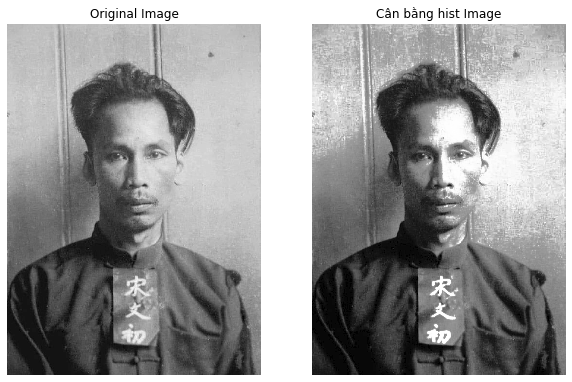

In [5]:
img = cv2.imread("Bac.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
equa_hist = cv2.equalizeHist(img_gray)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(equa_hist,cmap="gray")
plt.title("Cân bằng hist Image")
plt.axis("off")

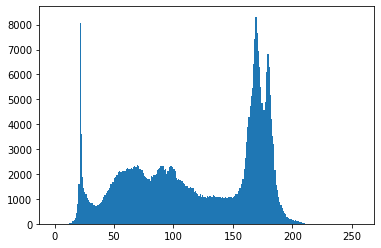

In [5]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.show()

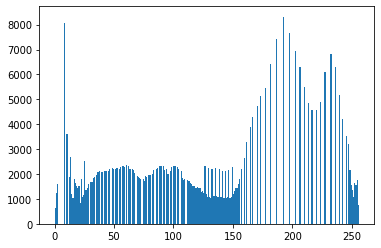

In [6]:
plt.hist(equa_hist.ravel(),256,[0,256])
plt.show()

2 Triển khai bộ lọc trung vị. Thêm các mức và loại nhiễu khác nhau vào hình ảnh và thử nghiệm với các kích thước hỗ trợ khác nhau cho bộ lọc trung vị.

[add salt](https://theailearner.com/tag/salt-and-pepper/)

In [6]:
import cv2
import numpy as np
from skimage.util import random_noise
 
# Thêm nhiễu salt-and-pepper
noise_img = random_noise(img_gray, mode='s&p',amount=0.1)
noise_img = np.array(255*noise_img, dtype = 'uint8')

(-0.5, 519.5, 719.5, -0.5)

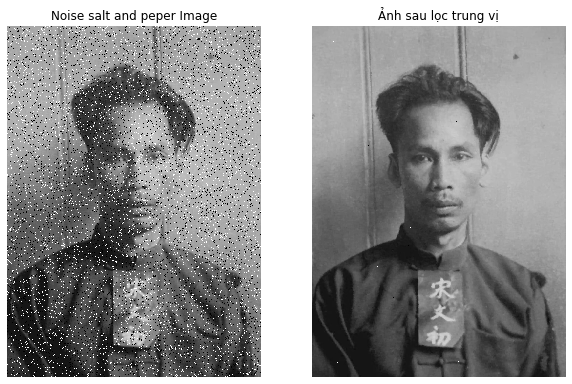

In [9]:
filter_med = cv2.medianBlur(noise_img,3)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise_img,cmap="gray")
plt.title("Noise salt and peper Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(filter_med,cmap="gray")
plt.title("Ảnh sau lọc trung vị")
plt.axis("off")

3 Triển khai thuật toán non-local means. Hãy thử các kích thước cửa sổ khác nhau. Thêm các mức độ noise khác nhau và xem ảnh hưởng của nó đối với nhu cầu đối với các vùng lân cận lớn hơn hoặc nhỏ hơn.

[non-local mean](https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html)

In [10]:
non_local = cv2.fastNlMeansDenoising(img,10,5,21)

(-0.5, 519.5, 719.5, -0.5)

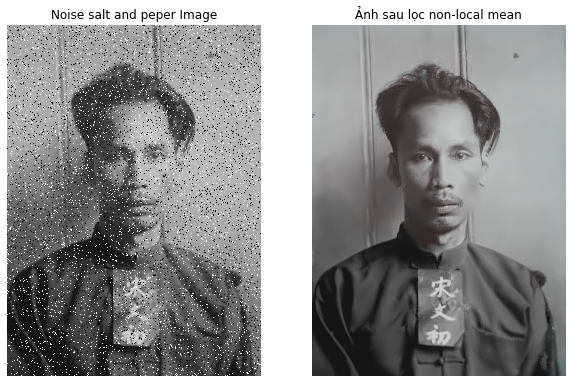

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise_img,cmap="gray")
plt.title("Noise salt and peper Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(non_local,cmap="gray")
plt.title("Ảnh sau lọc non-local mean")
plt.axis("off")

4 Thực hiện bộ dò cạnh màu cơ bản sử dụng toán tử Laplacian

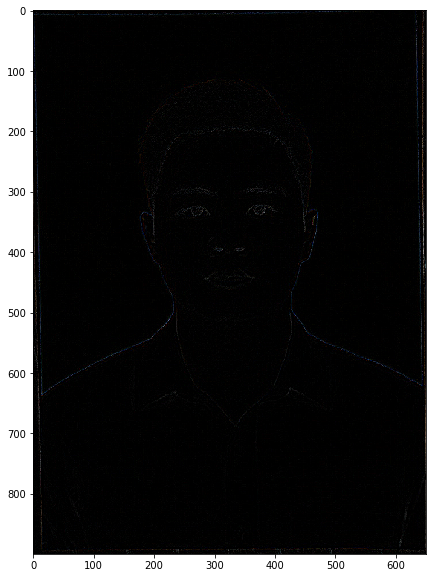

In [15]:
img = cv2.imread("hieule.jpg")
img = cv2.resize(img,(650,900))
laplacian = cv2.Laplacian(img,cv2.CV_8U,-1)
plt.figure(figsize=(10,10))
plt.imshow(laplacian)
plt.title("")
plt.axis("off")

5 Thực hiện kĩ thuật Unsharp masking để làm sắc nét một bức ảnh

Text(0.5, 1.0, 'Enhanced image, radius=20, amount=1.0')

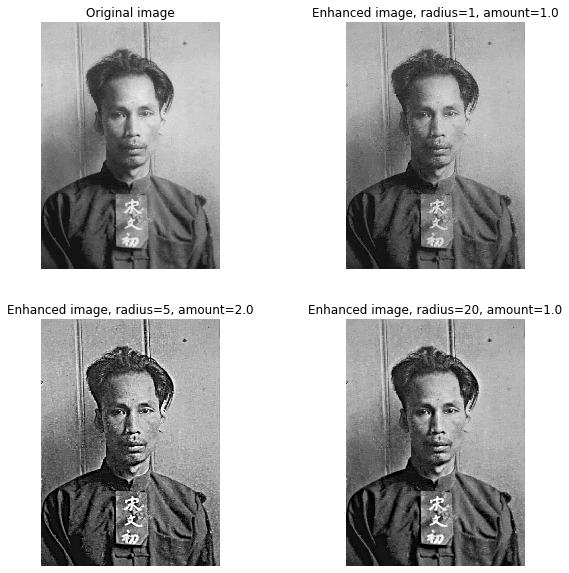

In [29]:
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = cv2.imread("Bac.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=10, amount=1)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title('Original image')

plt.subplot(2,2,2)
plt.imshow(result_1, cmap="gray")
plt.axis("off")
plt.title('Enhanced image, radius=1, amount=1.0')

plt.subplot(2,2,3)
plt.imshow(result_2, cmap="gray")
plt.axis("off")
plt.title('Enhanced image, radius=5, amount=2.0')

plt.subplot(2,2,4)
plt.imshow(result_3, cmap="gray")
plt.axis("off")
plt.title('Enhanced image, radius=20, amount=1.0')

6 Quay video và thực hiện histogram equalization từng khung hình và chạy video kết quả.
[read,write,display video](https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/)

In [16]:
import cv2
import numpy as np

cap = cv2.VideoCapture('test.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Đọc video
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    # Hiển thị kết quả
    cv2.imshow('Frame',gray)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

cap.release()

cv2.destroyAllWindows()


7 Lấy video và thực hiện frame-by-frame non-local means denoising.

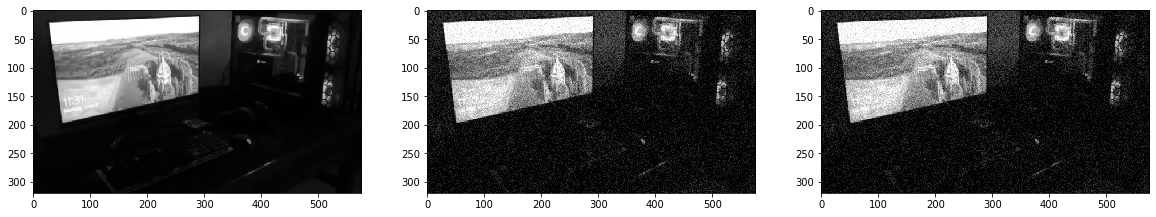

In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

cap = cv.VideoCapture('test.mp4')
# tạo danh sách 5 khung hình đầu tiên
img = [cap.read()[1] for i in range(5)]
# tạo danh sách 5 khung hình đầu tiên
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]
# chuyển đổi tất cả sang float64
gray = [np.float64(i) for i in gray]
# create a noise
noise = np.random.randn(*gray[1].shape)*20
# Thêm nhiễu này vào hình ảnh
noisy = [i+noise for i in gray]
# Chuyển đổi trở lại uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
# Denoise 3rd frame considering all the 5 frames
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray[2],'gray')
plt.subplot(132)
plt.imshow(noisy[2],'gray')
plt.subplot(133)
plt.imshow(dst,'gray')
plt.show()